<a href="https://colab.research.google.com/github/RajendharAre/Data_Analytics/blob/main/Innomatics_Data_Analytics_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3

pd.set_option('display.max_columns', None)

### Loding Orders Dataset


In [ ]:
orders = pd.read_csv('/orders.csv')
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


### Loading Users Dataset


In [ ]:
users = pd.read_json('/users.json')
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


### Loading Restaurants Dataset

In [ ]:
conn = sqlite3.connect('/restaurants.db')


In [ ]:
with open('/restaurants.sql', 'r') as file:
    sql_script = file.read()

conn.executescript(sql_script)

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


## Merging Datasets

### Merging orders and users

In [ ]:
orders_users = pd.merge(
    orders,
    users,
    on='user_id',
    how='left'
)
orders_users.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


### Merging orders_users and restaurants

In [ ]:
final_df = pd.merge(
    orders_users,
    restaurants,
    on='restaurant_id',
    how='left'
)

final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


#### Saving Final Dataset

In [ ]:
final_df.to_csv('final_food_delivery_dataset.csv', index=False)

#EDA (Exploratory Data Analysis)

In [17]:
final_df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


#### Shape & columns

In [18]:
final_df.shape


(10000, 12)

In [19]:
final_df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

#### Data types & nulls

In [20]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [21]:
final_df.isnull().sum()


,0
order_id,0
user_id,0
restaurant_id,0
order_date,0
total_amount,0
restaurant_name_x,0
name,0
city,0
membership,0
restaurant_name_y,0


#### Summary Statistics

In [22]:
final_df.describe()


,order_id,user_id,restaurant_id,total_amount,rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,801.162412,4.045430
std,2886.89568,861.727776,144.622558,405.458753,0.606531
min,1.00000,1.000000,1.000000,100.200000,3.000000
25%,2500.75000,761.000000,127.000000,446.310000,3.500000
50%,5000.50000,1508.000000,251.000000,806.295000,4.100000
75%,7500.25000,2250.250000,376.000000,1149.227500,4.600000
max,10000.00000,3000.000000,500.000000,1499.830000,5.000000


### Order Trends Over Time

In [26]:
final_df['order_date'] = pd.to_datetime(
    final_df['order_date'],
    format='%d-%m-%Y'
)

#### Orders per month

<Axes: title={'center': 'Orders Over Time'}, xlabel='order_date'>

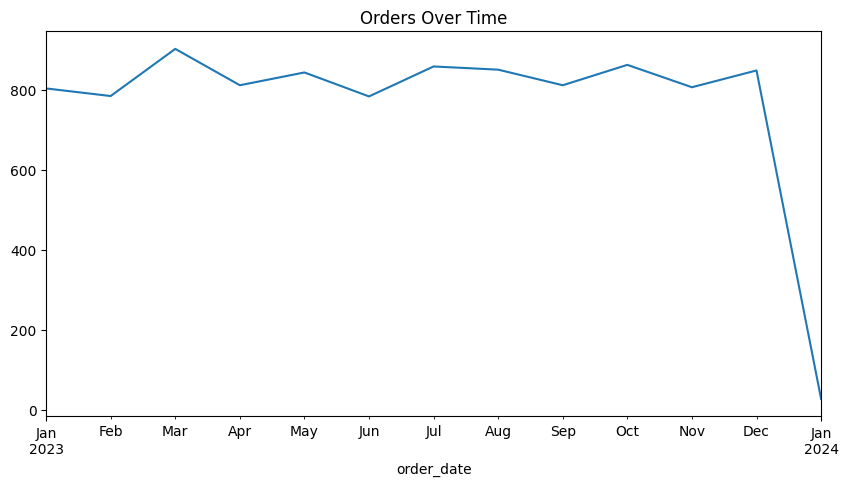

In [34]:
orders_monthly = final_df.groupby(final_df['order_date'].dt.to_period('M')).size()
orders_monthly.plot(kind='line', title='Orders Over Time', figsize=(10,5))


### Revenue Analysis

#### Revenue by city

<Axes: title={'center': 'Revenue by City'}, xlabel='city'>

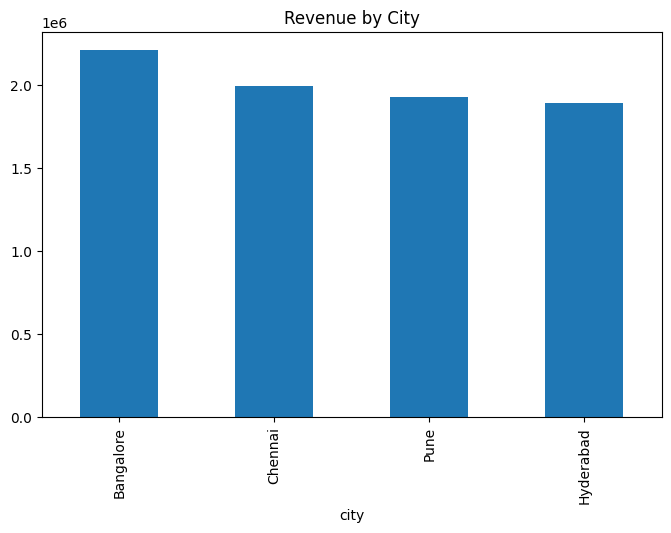

In [33]:
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
city_revenue.plot(kind='bar', title='Revenue by City', figsize=(8,5))


#### Revenue by membership type

<Axes: title={'center': 'Revenue by Membership'}, ylabel='total_amount'>

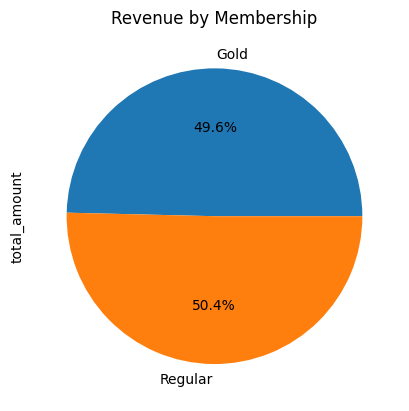

In [32]:
membership_revenue = final_df.groupby('membership')['total_amount'].sum()
membership_revenue.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Membership')


### User Behavior Analysis

In [31]:
orders_per_user = final_df.groupby('user_id')['order_id'].count()
orders_per_user.describe()
final_df['user_id'].nunique()

2883

#### High-value users

In [39]:
user_spending = final_df.groupby('user_id')['total_amount'].sum()
print((user_spending > 1000).sum())


2544


###Cuisine Analysis

<Axes: title={'center': 'Average Order Value by Cuisine'}, xlabel='cuisine'>

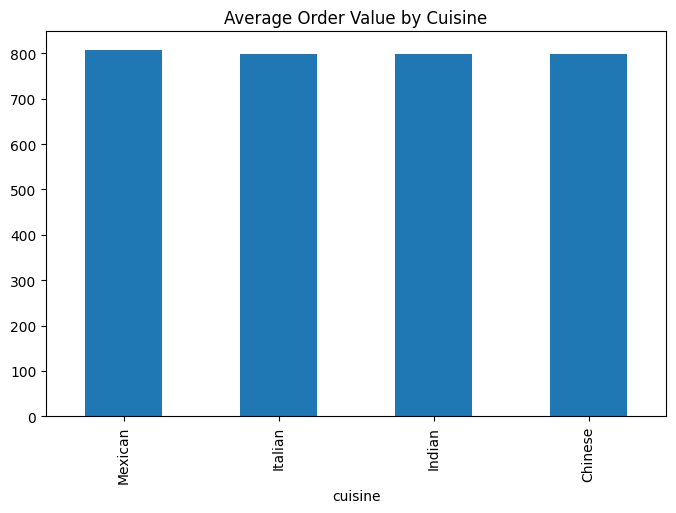

In [40]:
cuisine_aov = final_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)
cuisine_aov.plot(kind='bar', title='Average Order Value by Cuisine', figsize=(8,5))

### Restaurant Performance

#### Revenue by rating range

/tmp/ipython-input-797328465.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = final_df.groupby(rating_bins)['total_amount'].sum()


<Axes: title={'center': 'Revenue by Rating Range'}, xlabel='rating'>

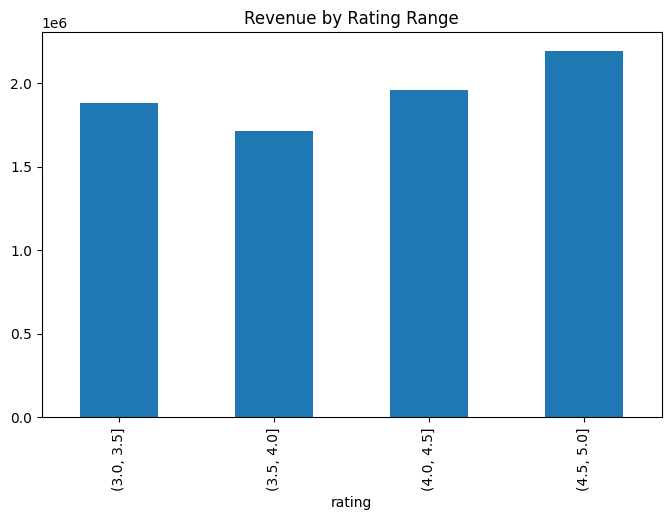

In [41]:
rating_bins = pd.cut(
    final_df['rating'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0]
)
rating_revenue = final_df.groupby(rating_bins)['total_amount'].sum()
rating_revenue.plot(kind='bar', title='Revenue by Rating Range', figsize=(8,5))

#### Restaurants with <20 orders but high AOV

In [44]:
restaurant_stats = final_df.groupby('restaurant_name_x').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)
restaurant_stats[
    restaurant_stats['total_orders'] < 20
].sort_values('avg_order_value', ascending=False).head()

,avg_order_value,total_orders
restaurant_name_x,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19


### Gold Members Focus

In [45]:
gold_df = final_df[final_df['membership'] == 'Gold']

In [49]:
print(gold_df.shape[0])
print(gold_df['total_amount'].mean())

4987
797.1455564467616


#### City-wise Gold revenue

In [50]:
gold_city_revenue = gold_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
gold_city_revenue

,total_amount
city,
Chennai,1080909.79
Pune,1003012.32
Bangalore,994702.59
Hyderabad,896740.19


### Quarter-wise Revenue

<Axes: title={'center': 'Quarter-wise Revenue'}, xlabel='quarter'>

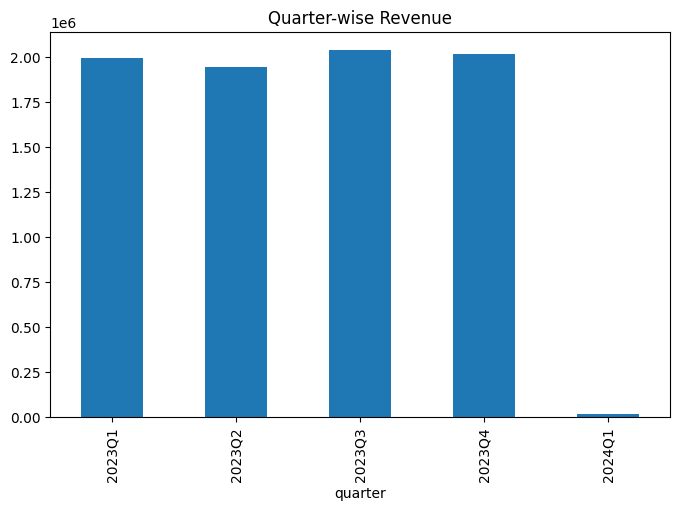

In [51]:
final_df['quarter'] = final_df['order_date'].dt.to_period('Q')
quarter_revenue = final_df.groupby('quarter')['total_amount'].sum()
quarter_revenue.plot(kind='bar', title='Quarter-wise Revenue', figsize=(8,5))

# Tasks

## MCQ Analysis

In [53]:
# Which city has the highest total revenue from Gold members?
gold_df = final_df[final_df['membership'] == 'Gold']
gold_city_revenue = (gold_df.groupby('city')['total_amount'].sum().sort_values(ascending=False))
gold_city_revenue

,total_amount
city,
Chennai,1080909.79
Pune,1003012.32
Bangalore,994702.59
Hyderabad,896740.19


In [58]:
# Which cuisine has the highest average order value?
final_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)

,total_amount
cuisine,
Mexican,808.021344
Italian,799.448578
Indian,798.466011
Chinese,798.389020


In [61]:
# How many distinct users placed orders worth more than ₹1000 total?
user_total = final_df.groupby('user_id')['total_amount'].sum()
count_users = (user_total > 1000).sum()
print(count_users)

2544


In [64]:
# which restaurant rating range generated the Highest total revenue?
rating_bins = pd.cut(
    final_df['rating'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0]
)
print(final_df.groupby(rating_bins)['total_amount'].sum())

rating
(3.0, 3.5]    1881754.57
(3.5, 4.0]    1717494.41
(4.0, 4.5]    1960326.26
(4.5, 5.0]    2197030.75
Name: total_amount, dtype: float64


/tmp/ipython-input-1301703123.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(final_df.groupby(rating_bins)['total_amount'].sum())


In [67]:
# Among Gold members, which city has the highest average order value?
gold_df.groupby('city')['total_amount'].mean().sort_values(ascending=False)

,total_amount
city,
Chennai,808.459080
Hyderabad,806.421034
Bangalore,793.223756
Pune,781.162243


In [69]:
# Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
cuisine_restaurants = final_df.groupby('cuisine')['restaurant_id'].nunique()
cuisine_revenue = final_df.groupby('cuisine')['total_amount'].sum()
pd.concat(
    [cuisine_restaurants, cuisine_revenue],
    axis=1,
    keys=['restaurant_count', 'total_revenue']
).sort_values('restaurant_count')

,restaurant_count,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [70]:
# What percentage of total orders were placed by Gold members?
total_orders = final_df.shape[0]
gold_orders = gold_df.shape[0]
percentage = (gold_orders / total_orders) * 100
round(percentage)

50

In [74]:
# Which restaurant has the highest AOV but < 20 total orders?
options = [
    'Grand Cafe Punjabi',
    'Grand Restaurant South Indian',
    'Ruchi Mess Multicuisine',
    'Ruchi Foods Chinese'
]
filtered_stats = restaurant_stats.loc[options]
filtered_stats[filtered_stats['total_orders'] < 20] \
    .sort_values('avg_order_value', ascending=False)

,avg_order_value,total_orders
restaurant_name_x,,
Ruchi Foods Chinese,686.603158,19


In [76]:
# Which combination contributes the highest revenue?
final_df.groupby(
    ['membership', 'cuisine']
)['total_amount'].sum().sort_values(ascending=False)

membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [77]:
# During which quarter is total revenue highest?
final_df.groupby(
    final_df['order_date'].dt.to_period('Q')
)['total_amount'].sum()

,total_amount
order_date,
2023Q1,1993425.14
2023Q2,1945348.72
2023Q3,2037385.10
2023Q4,2018263.66
2024Q1,17201.50


### Numerical Analysiss

In [78]:
# How many total orders were placed by users with Gold membership?
gold_df = final_df[final_df['membership'] == 'Gold']
gold_df.shape[0]

4987

In [79]:
# What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
hyderabad_revenue = final_df[
    final_df['city'] == 'Hyderabad'
]['total_amount'].sum()
round(hyderabad_revenue)

1889367

In [80]:
# How many distinct users placed at least one order?
final_df['user_id'].nunique()

2883

In [82]:
# What is the average order value (rounded to 2 decimals) for Gold members?
print(round(gold_df['total_amount'].mean(), 2))

797.15


In [83]:
# How many orders were placed for restaurants with rating >= 4.5?
final_df[final_df['rating'] >= 4.5].shape[0]

3374

In [85]:
# How many orders were placed in the top revenue city among Gold members only?
top_gold_city = (
    gold_df.groupby('city')['total_amount']
    .sum()
    .idxmax()
)
gold_df[gold_df['city'] == top_gold_city].shape[0]

1337

## Fill in the blanks


1.   The column used to join orders.csv and users.json is **user_id**.
2.   The dataset containing cuisine and rating information is stored in **SQL** format.
3. The total number of rows in the final merged dataset is **10000**.
4. If a user has no matching record in users.json, the merged values will be **NaN**.
5. The Pandas function used to combine datasets based on a key is **merge()**.
6. The column membership in the final dataset originates from the **users.json** file.
7. The join key used to combine orders data with restaurant details is **restaurant_id**.
8. The column that helps identify the type of food served by a restaurant is **cuisine**.
9. If a user places multiple orders, their personal details appear **multiple times** times in the final merged dataset.









---

